<a href="https://colab.research.google.com/github/msammons82/sonystockanalysis/blob/main/Sony_Stock_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance 
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

     |████████████████████████████████| 6.4 MB 8.0 MB/s 
     |████████████████████████████████| 63 kB 561 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Download the Data 

In [2]:
df = yf.download('SONY', start = '2010-01-01', end ='2022-04-10')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,29.520000,30.180000,29.500000,30.020000,30.020000,988800
2010-01-05,29.719999,29.930000,29.500000,29.879999,29.879999,567800
2010-01-06,29.879999,29.950001,29.660000,29.850000,29.850000,468200
2010-01-07,29.740000,29.870001,29.590000,29.799999,29.799999,645300
2010-01-08,30.040001,30.469999,29.930000,30.410000,30.410000,574100
...,...,...,...,...,...,...
2022-04-04,103.320000,105.050003,103.230003,105.040001,105.040001,746500
2022-04-05,103.349998,103.500000,100.720001,101.099998,101.099998,678100
2022-04-06,99.410004,99.820000,98.550003,99.370003,99.370003,669000


In [4]:
df['MA200'] = df['Adj Close'].rolling(window = 200).mean()
df['MA200'].dropna()

Date
2010-10-18     32.12535
2010-10-19     32.13960
2010-10-20     32.15625
2010-10-21     32.17400
2010-10-22     32.19215
                ...    
2022-04-04    110.23360
2022-04-05    110.25455
2022-04-06    110.26290
2022-04-07    110.27320
2022-04-08    110.28070
Name: MA200, Length: 2890, dtype: float64

# Visualization

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

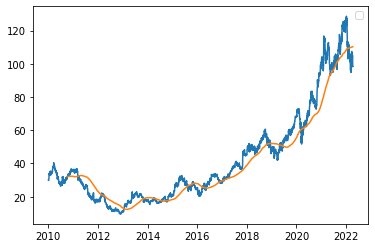

In [7]:
plt.plot(df['Adj Close'])
plt.plot(df['MA200'])
plt.show

In [8]:
df['price change'] = df['Adj Close'].pct_change()
df['price change'].dropna()

Date
2010-01-05   -0.004664
2010-01-06   -0.001004
2010-01-07   -0.001675
2010-01-08    0.020470
2010-01-11    0.006248
                ...   
2022-04-04    0.020599
2022-04-05   -0.037510
2022-04-06   -0.017112
2022-04-07   -0.011774
2022-04-08    0.000713
Name: price change, Length: 3088, dtype: float64

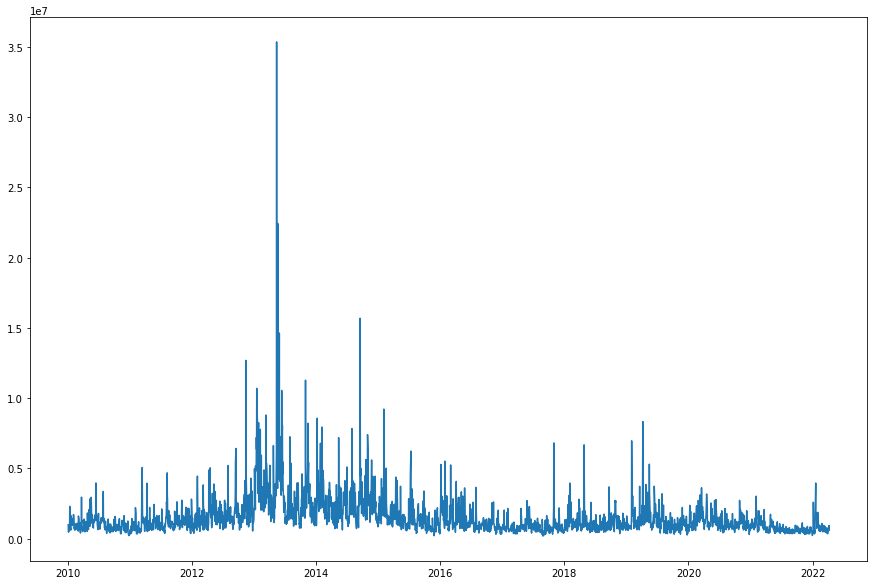

In [9]:
plt.figure(figsize = (15,10))
plt.plot(df['Volume'])

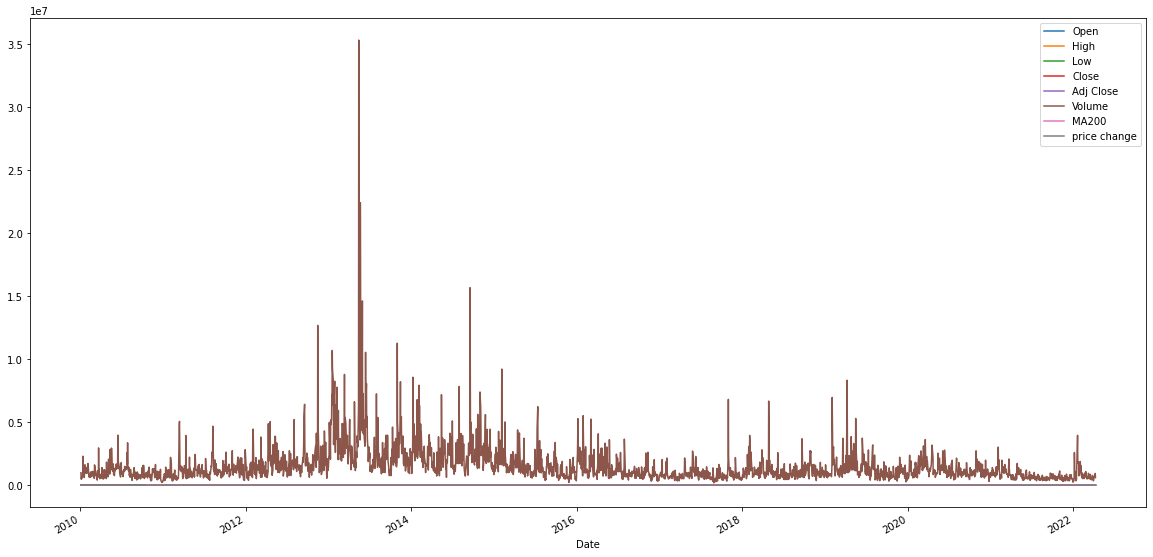

In [10]:
df.plot(figsize = (20,10))

Text(0.5, 1.0, 'Sony Stock At all Time')

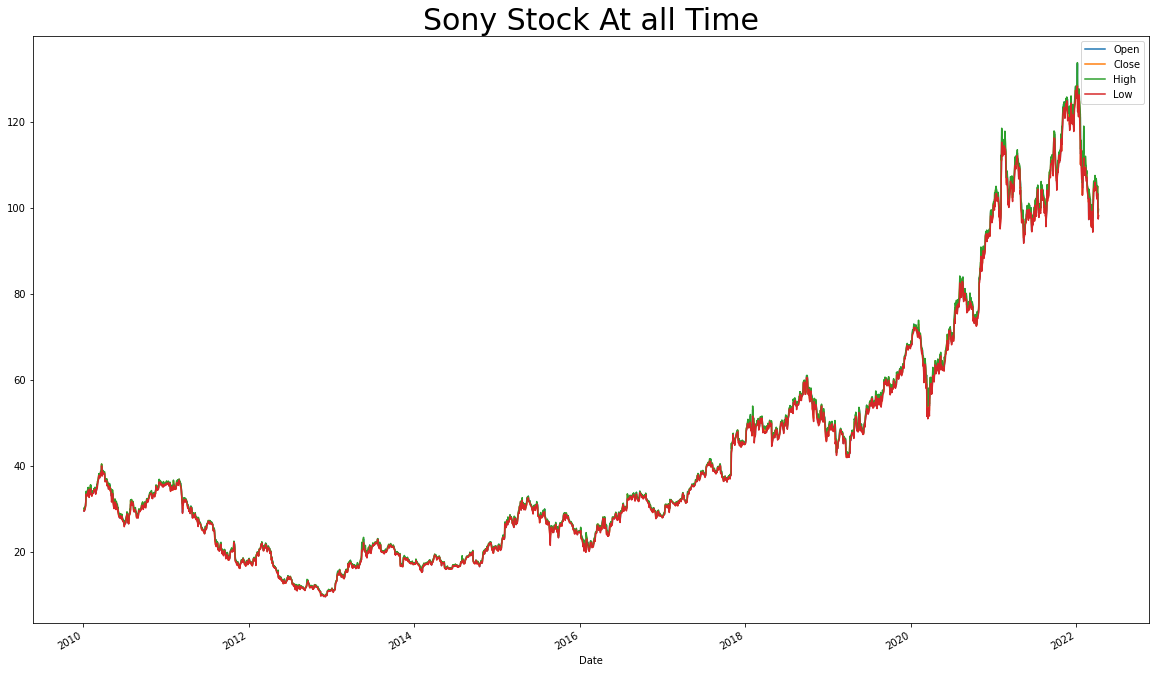

In [11]:
df[['Open', 'Close', 'High','Low']].plot(figsize = (20,12))
plt.title('Sony Stock At all Time', fontsize = 30)

Text(0, 0.5, 'Stock Action')

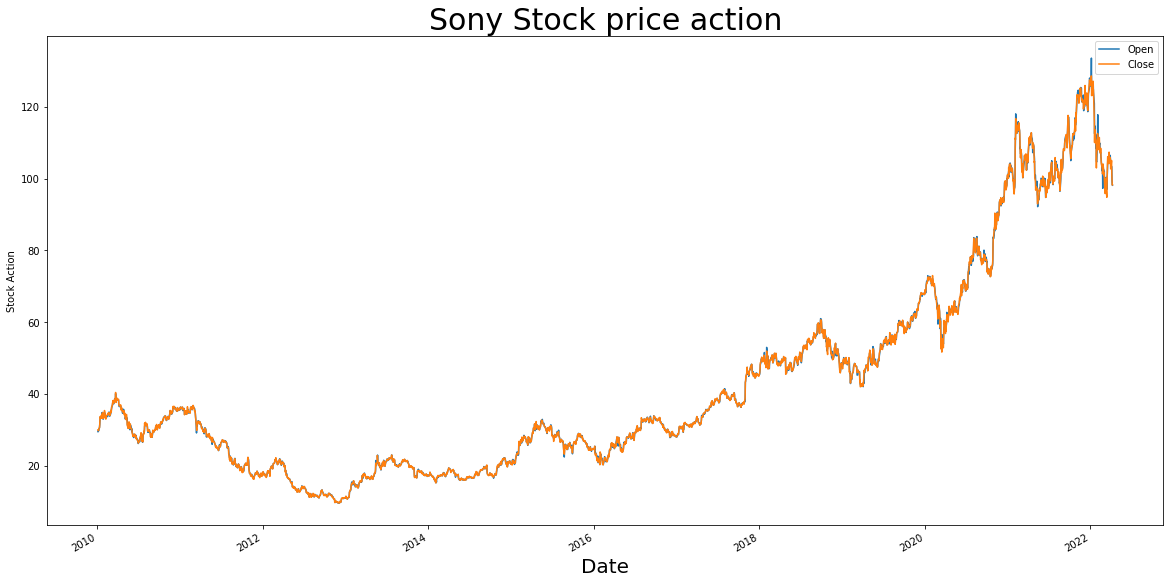

In [12]:
df[['Open', 'Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Sony Stock price action', fontsize = 30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Stock Action')

In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,MA200,price change
count,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3.089000e+03,2890.000000,3088.000000
mean,42.246322,42.551395,41.899404,42.237455,42.237455,1.507468e+06,40.172230,0.000591
std,28.310989,28.514547,28.061307,28.290278,28.290278,1.459585e+06,25.599310,0.020407
min,9.600000,9.710000,9.570000,9.630000,9.630000,1.882000e+05,12.308900,-0.111740
25%,21.049999,21.230000,20.820000,21.030001,21.030001,7.548000e+05,19.931675,-0.010692
50%,31.850000,32.009998,31.660000,31.840000,31.840000,1.112600e+06,31.466350,0.000427
75%,53.540001,53.840000,53.000000,53.320000,53.320000,1.750700e+06,51.600562,0.011104
max,133.559998,133.750000,128.309998,128.589996,128.589996,3.533250e+07,110.280700,0.176934


In [14]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,MA200,price change
Open,1.000000,0.999922,0.999891,0.999820,0.999820,-0.300916,0.977240,0.013440
High,0.999922,1.000000,0.999870,0.999905,0.999905,-0.298213,0.977549,0.017795
Low,0.999891,0.999870,1.000000,0.999924,0.999924,-0.303528,0.976867,0.018161
Close,0.999820,0.999905,0.999924,1.000000,1.000000,-0.300885,0.977151,0.022389
Adj Close,0.999820,0.999905,0.999924,1.000000,1.000000,-0.300885,0.977151,0.022389
Volume,-0.300916,-0.298213,-0.303528,-0.300885,-0.300885,1.000000,-0.325748,0.087303
MA200,0.977240,0.977549,0.976867,0.977151,0.977151,-0.325748,1.000000,-0.003019
price change,0.013440,0.017795,0.018161,0.022389,0.022389,0.087303,-0.003019,1.000000


# Augmented Dickey Fuller Test(ADF)

In [16]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [17]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                    0.362035
p-value                           0.980018
#Lags Used                       25.000000
Number of Observations Used    3063.000000
Critical Value (1%)              -3.432487
Critical Value (5%)              -2.862484
Critical Value (10%)             -2.567273
dtype: float64
None


In [18]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                   0.777374
p-value                          0.991262
#Lags Used                       7.000000
Number of Observations Used    140.000000
Critical Value (1%)             -3.477945
Critical Value (5%)             -2.882416
Critical Value (10%)            -2.577902
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                  -3.975421
p-value                          0.001545
#Lags Used                       6.000000
Number of Observations Used    140.000000
Critical Value (1%)             -3.477945
Critical Value (5%)             -2.882416
Critical Value (10%)            -2.577902
dtype: float64
None


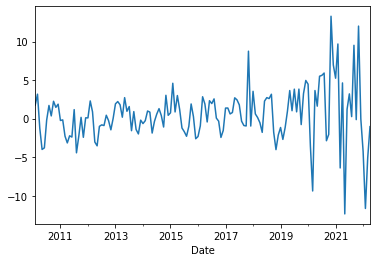

In [20]:
df_diff = df['Open'].resample('MS').mean() - df['Open'].resample('MS').mean().shift(1)
df_open_diff = df_diff.dropna()
df_open_diff.plot()
print(adf_test(df_open_diff))

# KPSS Test

In [23]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", lags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [24]:
kpss_test(df['High'])

Results of KPSS Test:
Test Statistic            6.806465
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


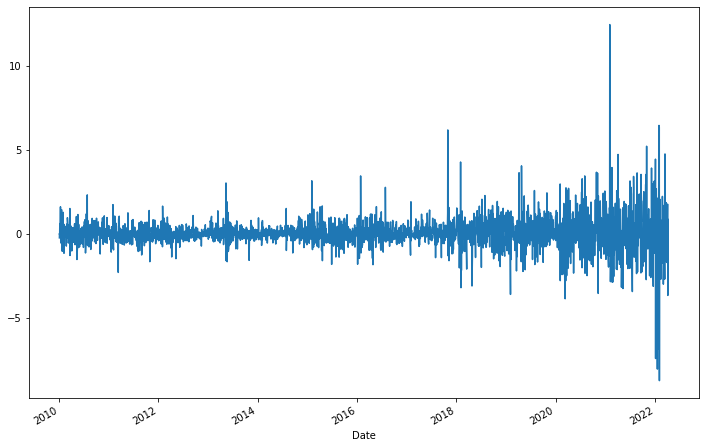

In [25]:
df['High_diff'] = df['High'] - df['High'].shift(1)
df['High_diff'].dropna().plot(figsize = (12,8))

In [26]:
kpss_test(df['High_diff'].dropna())

Results of KPSS Test:
Test Statistic           0.300687
p-value                  0.100000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [27]:
kpss_test(df['High'].resample('MS').mean().dropna())

Results of KPSS Test:
Test Statistic           1.297365
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [28]:
kpss_test(df['High'].resample('MS').std().dropna())

Results of KPSS Test:
Test Statistic           1.228437
p-value                  0.010000
Lags Used                7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


# Data Preprocessing

In [30]:
train_df = df['High'].iloc[:-4]

X_train =[]
y_train =[]

for i in range(2, len(train_df)):
  X_train.append(train_df[i-2:i])
  y_train.append(train_df[i])

In [31]:
import math
train_len = math.ceil(len(train_df)*0.8)
train_len

2468

# For Model and apply RNN + LSTM

In [32]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,TimeDistributed

In [33]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [34]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
31/31 - 2s - loss: 1324.2623 - 2s/epoch - 57ms/step
Epoch 2/10
31/31 - 0s - loss: 34.2399 - 106ms/epoch - 3ms/step
Epoch 3/10
31/31 - 0s - loss: 4.2134 - 106ms/epoch - 3ms/step
Epoch 4/10
31/31 - 0s - loss: 1.5410 - 118ms/epoch - 4ms/step
Epoch 5/10
31/31 - 0s - loss: 1.3956 - 123ms/epoch - 4ms/step
Epoc

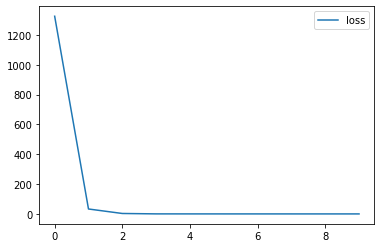

In [35]:
losse = pd.DataFrame(model.history.history)
losse[['loss']].plot()

In [36]:
test_data = train_df[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [37]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)

In [38]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 1.1206979824356895
Validation rmse: 2.004819568813715


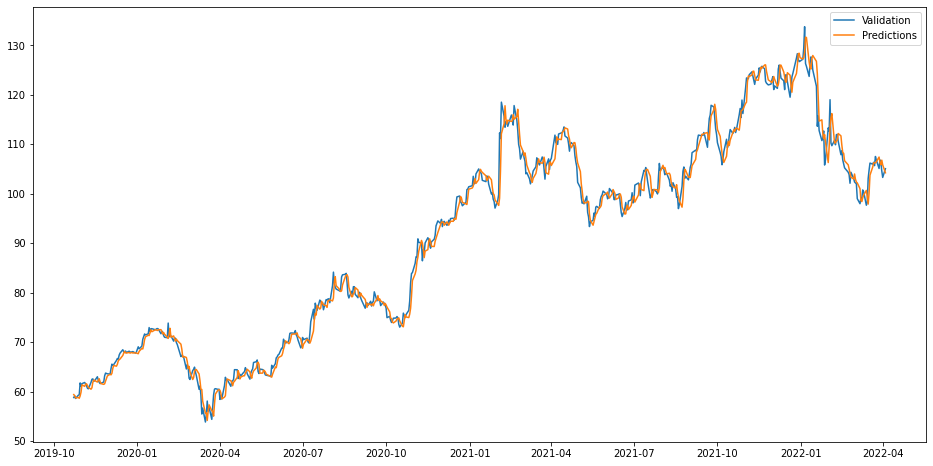

In [39]:
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [40]:
variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,617.000000
mean,0.109468
std,2.003453
min,-10.588730
25%,-0.956169
50%,0.160835
75%,1.173759
max,13.214439


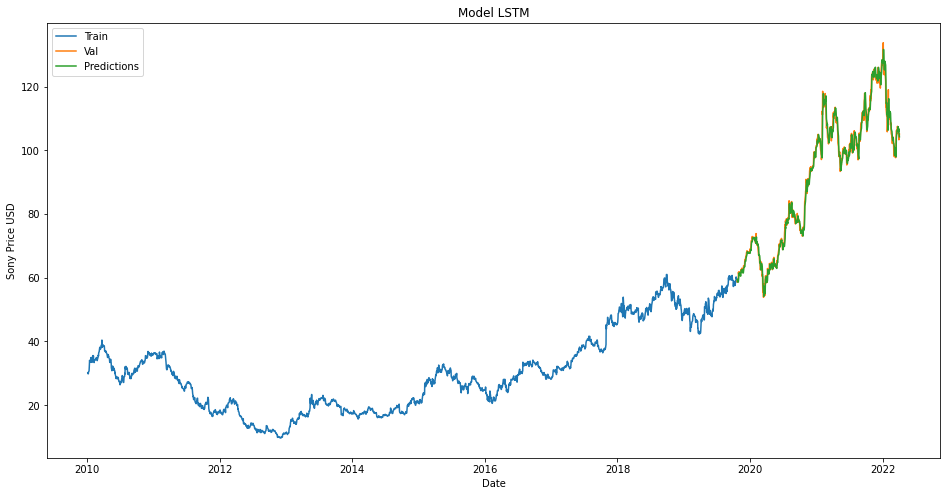

In [41]:
train = train_df[:train_len]
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Sony Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()